# Phase 1 Project: Ebay Perfume Analysis
#### Authored by Trinity Gahagen

## Objective
In this analysis, we will be exploring and analyzing different perfumes sold on ebay to research competition across different criteria.

*Dataset used*:

https://www.kaggle.com/datasets/kanchana1990/perfume-e-commerce-dataset-2024

*External References:*
- https://medium.com/@charlesmanimbo/the-difference-between-perfume-cologne-eau-de-toilette-and-more-34ac21281226
- https://www.ebay.com/

In [718]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

# Set parameters for plots
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'

purple_colors = ['#29004a', '#350061', '#3f0073', '#4a0087', '#6200b3', '#6200b3', '#7d00e3', '#8b00fc', '#9717ff', '#a02bff', '#ac47ff', '#bc6bff', '#c782ff', '#d29cff', '#daadff', '#e0baff']
red_colors = ['#6F1400', '#6F1400', '#A51D00', '#BB2100', '#D02500', '#E52800', '#F12B00', '#FF2D00', '#FF3A0F', '#FF4A23', '#FF5834', '#FF6442', '#FF7051', '#FF8166', '#FF8A71', '#FF937C']
blue_colors = ['#01005B', '#020073', '#020088', '#02009C', '#0300B4', '#0300CD', '#0300E2', '#0400F5', '#0400FF', '#1713FF', '#2C28FF', '#403DFF', '#524FFF', '#6361FF', '#7573FF', '#8381FF']

In [552]:
mens_perfume = pd.read_csv('ebay_mens_perfume.csv')
womens_perfume = pd.read_csv('ebay_womens_perfume.csv')

In [553]:
mens_perfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Dior,Christian Dior Sauvage Men's EDP 3.4 oz Fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,"May 24, 2024 10:03:04 PDT","Allen Park, Michigan, United States"
1,AS SHOW,A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,"May 23, 2024 23:07:49 PDT","Atlanta, Georgia, Canada"
2,Unbranded,HOGO BOSS cologne For Men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,"May 22, 2024 21:55:43 PDT","Dearborn, Michigan, United States"
3,Giorgio Armani,Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,"May 24, 2024 03:30:43 PDT","Reinholds, Pennsylvania, United States"
4,Lattafa,Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...,Fragrances,16.91,US $16.91,NaN,Limited quantity available / 156 sold,156.0,"May 24, 2024 07:56:25 PDT","Brooklyn, New York, United States"


In [554]:
womens_perfume.head()

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"


## Data Cleaning [*Hidden*]
The cells containing code that pertain to cleaning the data, including text processing, null value dropping and imputing, and feature engineering are hidden here.

First, I created columns for each table indicating what sex the perfume is intended for, including those that specify unisex.

In [555]:
mens_perfume['forMen'] = 1
womens_perfume['forWomen'] = 1
womens_perfume[['unisex','forMen']] = 0
mens_perfume[['unisex', 'forWomen']] = 0

print(mens_perfume.columns)
print(womens_perfume.columns)

Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation', 'forMen',
       'unisex', 'forWomen'],
      dtype='object')
Index(['brand', 'title', 'type', 'price', 'priceWithCurrency', 'available',
       'availableText', 'sold', 'lastUpdated', 'itemLocation', 'forWomen',
       'unisex', 'forMen'],
      dtype='object')


Then I combined these two tables by concatenating them to make one singular DataFrame.

In [556]:
perfumes = pd.concat([mens_perfume, womens_perfume], ignore_index=True)

In [557]:
perfumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1998 non-null   object 
 1   title              2000 non-null   object 
 2   type               1995 non-null   object 
 3   price              2000 non-null   float64
 4   priceWithCurrency  2000 non-null   object 
 5   available          1758 non-null   float64
 6   availableText      1989 non-null   object 
 7   sold               1978 non-null   float64
 8   lastUpdated        1874 non-null   object 
 9   itemLocation       2000 non-null   object 
 10  forMen             2000 non-null   int64  
 11  unisex             2000 non-null   int64  
 12  forWomen           2000 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 203.2+ KB


There were very few null values based off brand and type, so I decided that dropping them was 

In [558]:
perfumes.dropna(subset=['brand', 'type'], inplace=True)

Yhid 

In [559]:
UNISEX_MASK = perfumes['title'].str.lower().str.contains('unisex')
WOMEN_MASK = perfumes['title'].str.lower().str.contains('for women')
MEN_MASK = perfumes['title'].str.lower().str.contains('for men')

perfumes['unisex'] = np.where(UNISEX_MASK, 1, perfumes['unisex'])
perfumes['forWomen'] = np.where(WOMEN_MASK, 1, perfumes['forWomen'])
perfumes['forMen'] = np.where(MEN_MASK, 1, perfumes['forMen'])

for col in ['forWomen', 'forMen']:
    perfumes[col] = np.where(perfumes['unisex'] == 1, 0, perfumes[col])

In [560]:
perfumes['type'].unique()

array(['Eau de Parfum', 'Eau de Toilette', 'Fragrances', 'Perfume', '/',
       'PARFUM', 'Parfum', 'Concentrated Uncut Pure Body Oil',
       'LE PARFUM', 'Eau De Parfum', 'Unscented', 'Eau de Cologne',
       '~ THE ONE EAU DE PARFUM SPRAY ~', 'EXTRAIT DE PARFUM',
       'Eau De Toilette', 'Eau De Parfum Intense', 'Pheromone',
       'Aftershave', 'Fragrance & Perfume', 'Eau de Perfume',
       'Jo Malone Cologne Intense Spray', 'Y', 'Gift Sets',
       'Fragrance Rolling Ball', 'Body Spray', 'Eau de toilette',
       'Eau de Toillette',
       'Eau De Toilette, Eau De Parfum, Eau De Parfum Intense', 'Cologne',
       'le parfum', 'Eau de Toilette Intense',
       'Eau de Cologne Spray, Cologne Spray', 'Extrait De Parfum',
       'Fine Cologne', 'Does not apply', 'EDT', 'Extrait de Parfum',
       'Editions Parfums', 'DIOR HOMME COLOGNE', 'Deodorant', 'De Nuit',
       'Eau de Toilette, Cologne Spray', 'Parfum Intense',
       'Eau de Parfum Intense', 'cologne', 'EAU DE COLOGNE SPRAY

In [561]:
eau_de_toilette = "(eau){1} de toi.*|edt"
eau_de_parfum = "(eau){1} de parfum|edp|eau de perfume"
mist = "mist"
cologne = "cologne|edc"
oil = "(?!t)oil"
fragrance = "fragrance"
roll_on = "roll"
lotion = "lotion|moisturizer|cream"
deodorant = "deodorant"
sets = "set|pc"
perfume = "perfume|^parfum"

type_masks = [eau_de_toilette, eau_de_parfum, mist, cologne, oil, fragrance, roll_on, lotion, deodorant, sets, perfume]

type_categories = [
    "Eau De Toilette",
    "Eau De Parfum",
    "Mist",
    "Cologne",
    "Oil",
    "Fragrance",
    "Roll On",
    "Lotion",
    "Deodorant",
    "Sets",
    "Perfume"
]

type_conditions = [(perfumes['type'].str.lower().str.contains(condition, na=False)) for condition in type_masks]

c:\Users\twitt\anaconda3\envs\learn-env\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [562]:
perfumes['type_clean'] = np.select(type_conditions, type_categories, default="Other")

In [563]:
print(perfumes['type_clean'].unique())

['Eau De Parfum' 'Eau De Toilette' 'Fragrance' 'Perfume' 'Other' 'Oil'
 'Cologne' 'Sets' 'Deodorant' 'Roll On' 'Mist' 'Lotion']


In [564]:
perfumes['itemLocation'].unique()

array(['Allen Park, Michigan, United States', 'Atlanta, Georgia, Canada',
       'Dearborn, Michigan, United States',
       'Reinholds, Pennsylvania, United States',
       'Brooklyn, New York, United States',
       'Houston, Texas, United States',
       'Englewood Cliffs, New Jersey, United States',
       'Ithaca, New York, United States', 'shanghai, China',
       'Dearborn Heights, Michigan, United States',
       'Ecorse, Michigan, United States',
       'Warren, Michigan, United States',
       'San Francisco, California, United States',
       'Dayton,New Jersey, Hong Kong',
       'San Jose, California, United States',
       'Miami, Florida, United States',
       'Hamtramck, Michigan, United States',
       'Flat Lick, Kentucky, United States',
       'Elmhurst, New York, United States',
       'Hackensack, New Jersey, United States',
       'Dallas, Texas, United States',
       'Pomona, California, United States', 'Katy, Texas, United States',
       'College Point, New 

In [565]:
usa = "usa|united states|us|estados unidos|unitedstates"
hong_kong = "hong kong|hk|hongkong"
china = "china"
india = "india"
pakistan = "pakistan"
canada = "canada"
taiwan = "taiwan"
brazil = "brazil"
japan = "japan"
bulgaria = "bulgaria"

location_masks = [usa, hong_kong, china, india, pakistan, canada, taiwan, brazil, japan, bulgaria]

location_categories = [
    "USA",
    "HK",
    "China",
    "India",
    "Pakistan",
    "Canada",
    "Taiwan",
    "Brazil",
    "Japan",
    "Bulgaria"
]

location_conditions = [(perfumes['itemLocation'].str.lower().str.contains(condition, na=False)) for condition in location_masks]

zipped_locations = zip(location_categories, location_conditions)

In [566]:
for place, condition in zipped_locations:
    col_label = f'shipsFrom{place}'
    perfumes[col_label] = condition.map(lambda x: 1 if x == True else 0)

In [567]:
perfumes['brand'] = perfumes['brand'].str.title().str.strip(' ~')
perfumes['brand'].unique()

array(['Dior', 'As Show', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Multiple Brands', 'Maison Alhambra', 'Gucci', 'Ralph Lauren',
       'Dolce&Gabbana', 'Secertmu', 'Versace', 'Paco Rabanne', 'Grandeur',
       'Armaf', 'Carolina Herrera', 'Dolce & Gabbana', 'Clinique',
       'Dumont', 'Afnan', 'Azzaro', "Penhaligon'S", 'Bharara',
       'Valentino', 'Guy Laroche', 'Montblanc', 'Rasasi', 'Calvin Klein',
       'Uomo', 'Givenchy', 'Polo Ralph Lauren', 'C.K', 'John Varvatos',
       'Nautica', 'As Picture Show', 'Kenneth Cole', 'Tommy Hilfiger',
       '2Nd To None', 'Yves Saint Laurent', 'Cologne', 'As Shown', 'Roja',
       'Metaherbal Labs', 'Mirage Brands', 'Abercrombie & Fitch',
       'Moschino', 'Superz Budapest', 'Gianni Versace', 'Christian Dior',
       'Hermès', 'Diesel', 'Lacoste', 'Dossier', 'Burberry',
       'Michael Malul', 'Zara', 'Aramis', 'Jean Paul Gaultier',
       'Davidoff', 'As Picture Shown', 'Bvlgari', 'Parfums De Marly',
       'Salvatore Ferragamo', 

In [568]:
unbranded = "unbranded|.*show.*|.*photo.*|ass[.*]t|change for women|perfume|does not apply|branded|generic|multiple brands|classic brand"
armani = "giorgio|armani"
calvin_klein = "calvin klein|c[\s\S]k"
dolce = "dolce|gab+an+a"
viktor_rolf = "vi[ck]tor[\s+\S+]rolf"
jlo = "jlo|j lo"
eilish = "eilish"
roja = "roja"
ralph_lauren = "(lauren)\Z|polo"
dior = "dior"
lancome = "lanc.me"
parfums_gres = "parfums gr.s"
al_hambra = "al hambra"
maison_alhambra = "maison alhambra"
mfk = "maison francis kurkdjian|mfk|maison$"
maison_margiela = "margiela"
tiffany = "tiffany[\s\S]co"
versace = "versace"
mercedes = "mercedes"
michael_malul = "malul"
fragrance_one = "^fragance"

brand_masks = [unbranded,
                armani,
                calvin_klein,
                dolce,
                viktor_rolf,
                jlo,
                eilish,
                roja,
                ralph_lauren,
                dior,
                lancome,
                parfums_gres,
                al_hambra,
                maison_alhambra,
                mfk,
                maison_margiela,
                tiffany,
                versace,
                mercedes,
                michael_malul,
                fragrance_one]

brand_categories = [
    "Unbranded",
    "Giorgio Armani",
    "Calvin Klein",
    "Dolce & Gabbana",
    "Viktor & Rolf",
    "J Lo",
    "Billie Eilish",
    "Roja",
    "Ralph Lauren",
    "Dior",
    "Lancome",
    "Parfums Gres",
    "Al Hambra",
    "Maison Alhambra",
    "MFK",
    "Maison Margiela",
    "Tiffany & Co\.",
    "Versace",
    "Mercedes Benz",
    "Michael Malul",
    "Fragrance One"
]


brand_conditions = [(perfumes['brand'].str.lower().str.contains(condition, na=False)) for condition in brand_masks]

zipped = zip(brand_conditions, brand_categories)


In [569]:
for condition, label in zipped:
    perfumes['brand'] = np.where(condition, label, perfumes['brand'])

In [570]:
perfumes['brand'].unique()

array(['Dior', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Maison Alhambra', 'Gucci', 'Ralph Lauren', 'Dolce & Gabbana',
       'Secertmu', 'Versace', 'Paco Rabanne', 'Grandeur', 'Armaf',
       'Carolina Herrera', 'Clinique', 'Dumont', 'Afnan', 'Azzaro',
       "Penhaligon'S", 'Bharara', 'Valentino', 'Guy Laroche', 'Montblanc',
       'Rasasi', 'Calvin Klein', 'Uomo', 'Givenchy', 'John Varvatos',
       'Nautica', 'Kenneth Cole', 'Tommy Hilfiger', '2Nd To None',
       'Yves Saint Laurent', 'Cologne', 'Roja', 'Metaherbal Labs',
       'Mirage Brands', 'Abercrombie & Fitch', 'Moschino',
       'Superz Budapest', 'Hermès', 'Diesel', 'Lacoste', 'Dossier',
       'Burberry', 'Michael Malul', 'Zara', 'Aramis',
       'Jean Paul Gaultier', 'Davidoff', 'Bvlgari', 'Parfums De Marly',
       'Salvatore Ferragamo', 'Ard Al Zaafaran', 'Karl Lagerfeld',
       'J. Del Pozo', 'Sean John', 'Ysl', 'Jaguar', 'Ebc',
       'Bath & Body Works', 'Issey Miyake', 'King', 'Prada', 'Hugo Boss',
      

In [571]:
perfumes['availableText'].unique()

array(['More than 10 available / 116 sold', '8 available / 48 sold',
       'More than 10 available / 27 sold', ..., '33 available / 58 sold',
       '3 available / 117 sold', '4 available / 51 sold'], dtype=object)

In [572]:
perfumes['available'] = np.where(perfumes['availableText'].str.lower().str.contains('last\s*one|limited quantity available'), 1, perfumes['available'])
perfumes['available'] = np.where(perfumes['availableText'].str.lower().str.contains('out of stock'), 0, perfumes['available'])

perfumes['sold'].fillna(-1, inplace=True)
perfumes['lastUpdated'].fillna('Unknown', inplace=True)

perfumes['availabilityExact'] = np.where(perfumes['availableText'].str.lower().str.contains('^\d+\savailable|last one|out of stock'), 1, 0)


In [573]:
perfumes[['available', 'availableText', 'availabilityExact']].head(15)

,available,availableText,availabilityExact
0,10.0,More than 10 available / 116 sold,0
1,8.0,8 available / 48 sold,1
2,10.0,More than 10 available / 27 sold,0
3,2.0,2 available / 159 sold,1
4,1.0,Limited quantity available / 156 sold,0
5,10.0,More than 10 available / 79 sold,0
6,9.0,9 available / 39 sold,1
7,1.0,Last One / 6 sold,1
8,10.0,10 available / 17 sold,1
9,8.0,8 available / 68 sold,1


In [574]:
perfumes_clean = perfumes.drop(columns=['type', 'priceWithCurrency', 'itemLocation', 'availableText', 'title'])
perfumes_clean.rename(columns={'available':'minimumAvailable', 'type_clean':'perfumeType'}, inplace=True)

# Reorder the columns
perfumes_clean = perfumes_clean[['brand',
                                'perfumeType',
                                'price',
                                'minimumAvailable',
                                'availabilityExact',
                                'sold',
                                'lastUpdated',
                                'forMen',
                                'forWomen',
                                'unisex',
                                'shipsFromUSA',
                                'shipsFromHK',
                                'shipsFromChina',
                                'shipsFromIndia',
                                'shipsFromPakistan',
                                'shipsFromCanada',
                                'shipsFromTaiwan',
                                'shipsFromBrazil',
                                'shipsFromJapan',
                                'shipsFromBulgaria']]

perfumes_clean.head()

,brand,perfumeType,price,minimumAvailable,availabilityExact,sold,lastUpdated,forMen,forWomen,unisex,shipsFromUSA,shipsFromHK,shipsFromChina,shipsFromIndia,shipsFromPakistan,shipsFromCanada,shipsFromTaiwan,shipsFromBrazil,shipsFromJapan,shipsFromBulgaria
0,Dior,Eau De Parfum,84.99,10.0,0,116.0,"May 24, 2024 10:03:04 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
1,Unbranded,Eau De Parfum,109.99,8.0,1,48.0,"May 23, 2024 23:07:49 PDT",1,0,0,0,0,0,0,0,1,0,0,0,0
2,Unbranded,Eau De Toilette,100.00,10.0,0,27.0,"May 22, 2024 21:55:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
3,Giorgio Armani,Eau De Toilette,44.99,2.0,1,159.0,"May 24, 2024 03:30:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
4,Lattafa,Fragrance,16.91,1.0,0,156.0,"May 24, 2024 07:56:25 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0


In [575]:
perfumes_clean['minimumAvailable'].fillna(-1, inplace=True)
perfumes_clean.isna().sum()

brand                0
perfumeType          0
price                0
minimumAvailable     0
availabilityExact    0
sold                 0
lastUpdated          0
forMen               0
forWomen             0
unisex               0
shipsFromUSA         0
shipsFromHK          0
shipsFromChina       0
shipsFromIndia       0
shipsFromPakistan    0
shipsFromCanada      0
shipsFromTaiwan      0
shipsFromBrazil      0
shipsFromJapan       0
shipsFromBulgaria    0
dtype: int64

## Exploratory Data Analysis

In [576]:
perfumes_clean.head()

,brand,perfumeType,price,minimumAvailable,availabilityExact,sold,lastUpdated,forMen,forWomen,unisex,shipsFromUSA,shipsFromHK,shipsFromChina,shipsFromIndia,shipsFromPakistan,shipsFromCanada,shipsFromTaiwan,shipsFromBrazil,shipsFromJapan,shipsFromBulgaria
0,Dior,Eau De Parfum,84.99,10.0,0,116.0,"May 24, 2024 10:03:04 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
1,Unbranded,Eau De Parfum,109.99,8.0,1,48.0,"May 23, 2024 23:07:49 PDT",1,0,0,0,0,0,0,0,1,0,0,0,0
2,Unbranded,Eau De Toilette,100.00,10.0,0,27.0,"May 22, 2024 21:55:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
3,Giorgio Armani,Eau De Toilette,44.99,2.0,1,159.0,"May 24, 2024 03:30:43 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0
4,Lattafa,Fragrance,16.91,1.0,0,156.0,"May 24, 2024 07:56:25 PDT",1,0,0,1,0,0,0,0,0,0,0,0,0


In [577]:
perfumes_clean.describe()

,price,minimumAvailable,availabilityExact,sold,forMen,forWomen,unisex,shipsFromUSA,shipsFromHK,shipsFromChina,shipsFromIndia,shipsFromPakistan,shipsFromCanada,shipsFromTaiwan,shipsFromBrazil,shipsFromJapan,shipsFromBulgaria
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,43.142618,18.371113,0.639920,598.697593,0.495486,0.495988,0.012538,0.948345,0.053159,0.012538,0.004012,0.000502,0.008024,0.006018,0.000502,0.000502,0.000502
std,32.585874,53.699996,0.480144,2149.370822,0.500105,0.500109,0.111295,0.221385,0.224408,0.111295,0.063229,0.022394,0.089239,0.077362,0.022394,0.022394,0.022394
min,1.990000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.957500,3.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.040000,9.000000,1.000000,49.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.877500,10.000000,1.000000,278.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299.990000,842.000000,1.000000,40130.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [578]:
perfumes_clean.describe(include="O")

,brand,perfumeType,lastUpdated
count,1994,1994,1994
unique,327,12,1826
top,Unbranded,Eau De Parfum,Unknown
freq,132,929,126


### Potential Questions
- What are the most popular types of perfumes for men and women?
- What is the distribution of locations that perfumes ship from?
- Which brands have the highest average price? Which types or perfumes?
- Which brands sold the most for men and for women?
- Which gender's perfumes are more expensive on average?
- On average, do US-only sellers sell more items than sellers that ship from multiple countries?

#### Question 1.1: What is the distribution of different perfume types?

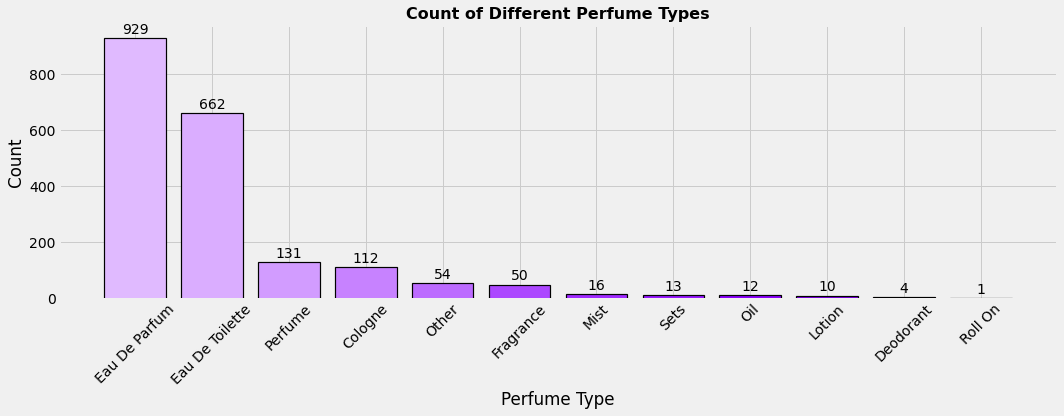

In [721]:
# What is the distribution of perfume types?
fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(x=perfumes_clean['perfumeType'].value_counts().index, height=perfumes_clean['perfumeType'].value_counts(), color=purple_colors[::-1], edgecolor='black', linewidth=1.2)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Count of Different Perfume Types')
ax.set_xlabel('Perfume Type')
ax.set_ylabel('Count')
for i in perfumes_clean['perfumeType'].value_counts().index:
    ax.annotate(f'{perfumes_clean["perfumeType"].value_counts()[i]}', xy=(i, perfumes_clean["perfumeType"].value_counts()[i] + 30), va='center', ha='center')
plt.tight_layout();

#### Question 1.2: Which locations do perfumes ship from most?

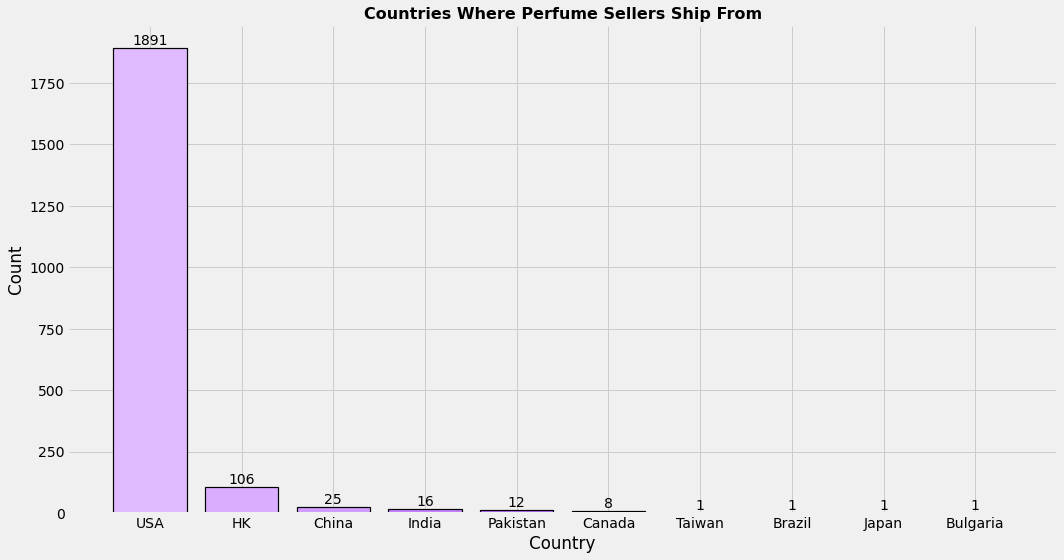

In [759]:
fig, ax = plt.subplots(figsize=(15, 8))
locations_count = perfumes_clean.loc[:, 'shipsFromUSA':].sum().sort_values(ascending=False)
plt.bar(x=locations_count.index, height=locations_count, color=purple_colors[::-1], edgecolor='black', linewidth=1.2)

for i in locations_count.index:
    ax.annotate(f'{locations_count[i]}', xy=(i, locations_count[i] + 30), va='center', ha='center')
ax.set_title('Countries Where Perfume Sellers Ship From')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(location_categories)), labels=location_categories)
plt.tight_layout();

#### Question 2: Which brands have the highest average price?  Which types of perfumes have the highest average price?

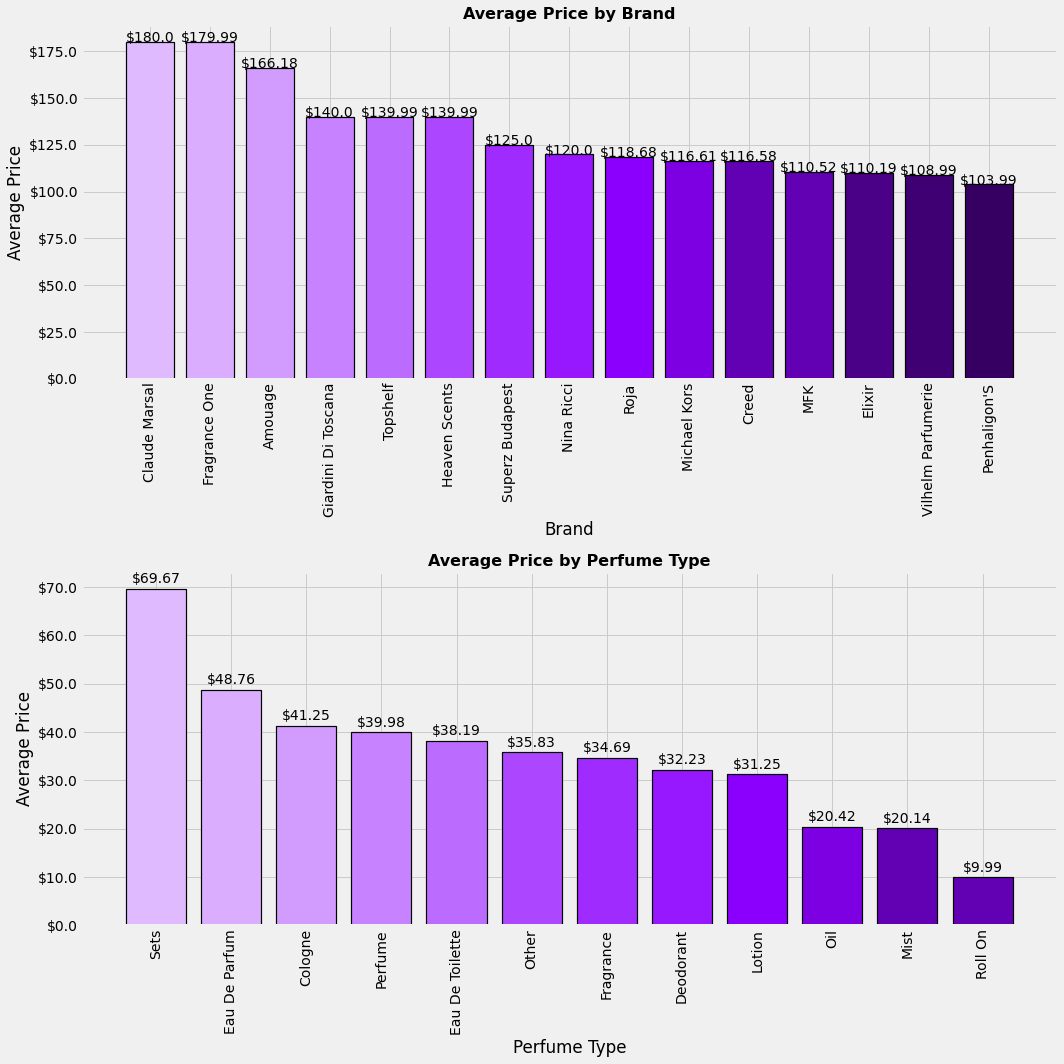

In [752]:
def find_aggregate_columns(df, gb_column, agg_func, agg_col):
    return df.groupby(gb_column)[agg_col].agg(agg_func).sort_values(ascending=False)

fig, ax = plt.subplots(2, 1, figsize=(15, 15))

n = 0
for col, label in [('brand', 'Brand'), ('perfumeType', 'Perfume Type')]:
    if len(find_aggregate_columns(perfumes_clean, col, 'mean', 'price')) > 15:
        plot_func = find_aggregate_columns(perfumes_clean, col, 'mean', 'price')[:15]
    else:
        plot_func = find_aggregate_columns(perfumes_clean, col, 'mean', 'price')
    ax[n].bar(x=plot_func.index, height=plot_func, color=purple_colors[::-1], edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Average Price by {label}')
    ax[n].set_xlabel(f'{label}')
    ax[n].set_ylabel(f'Average Price')
    ax[n].tick_params(axis='x', rotation=90)
    for i in plot_func.index:
        ax[n].annotate(f'${plot_func[i].round(2)}', xy=(i, plot_func[i] + 2), va='center', ha='center')
        ax[n].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
    n += 1
plt.tight_layout();

#### Question 3.1: What is the distribution of each of the top brands' price? 

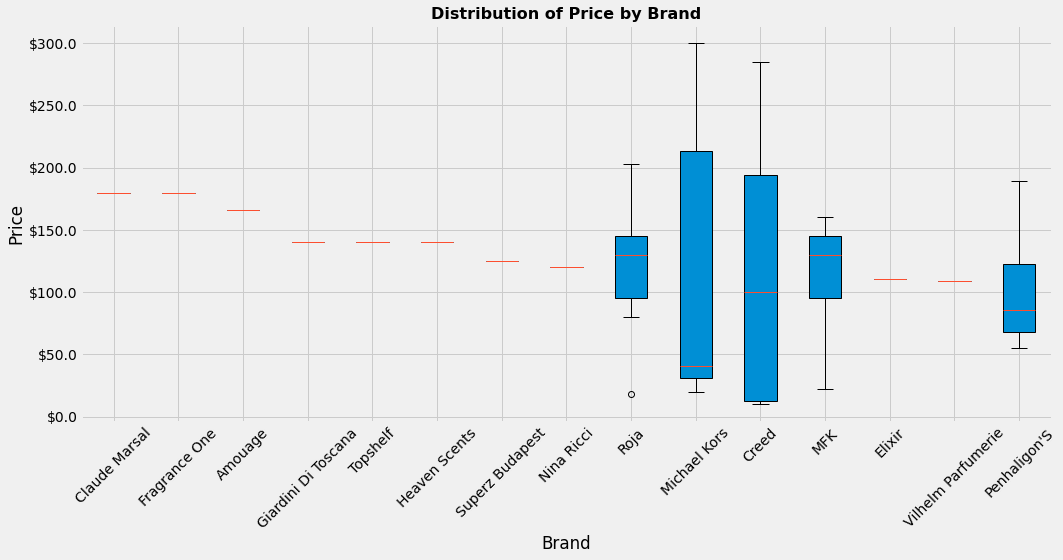

In [722]:
# What's the spread of the top brands' price?
top_brands = list(find_aggregate_columns(perfumes_clean, 'brand', 'mean', 'price').index[:15])
fig, ax = plt.subplots(figsize=(15, 8))
data = []
for brand in top_brands:
    data.append(perfumes_clean.loc[perfumes_clean['brand'].isin([brand])]['price'])

ax.boxplot(x=data, labels=top_brands, vert=True, patch_artist=True)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of Price by Brand')
ax.set_xlabel('Brand')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
plt.tight_layout();

#### Question 3.2: What is the distribution of each of the top types' price? 

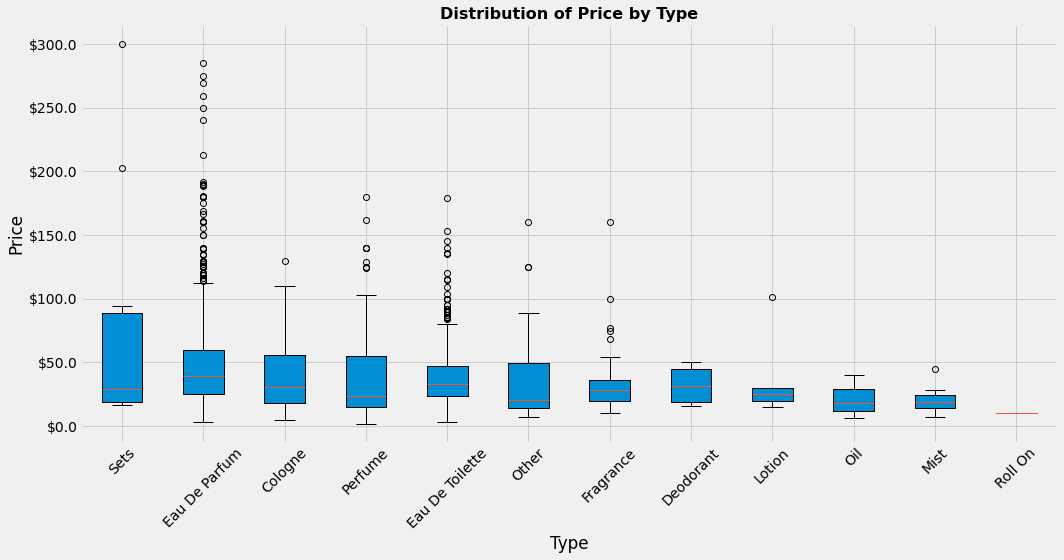

In [723]:
# What's the spread of the top types' price?
top_types = list(find_aggregate_columns(perfumes_clean, 'perfumeType', 'mean', 'price').index[:15])
fig, ax = plt.subplots(figsize=(15, 8))
data = []
for type in top_types:
    data.append(perfumes_clean.loc[perfumes_clean['perfumeType'].isin([type])]['price'])

ax.boxplot(x=data, labels=top_types, vert=True, patch_artist=True)
ax.tick_params(axis='x', rotation=45)
ax.set_title('Distribution of Price by Type')
ax.set_xlabel('Type')
ax.set_ylabel('Price')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
plt.tight_layout();

#### Question 4: What are the top selling brands and types of perfumes across genders?

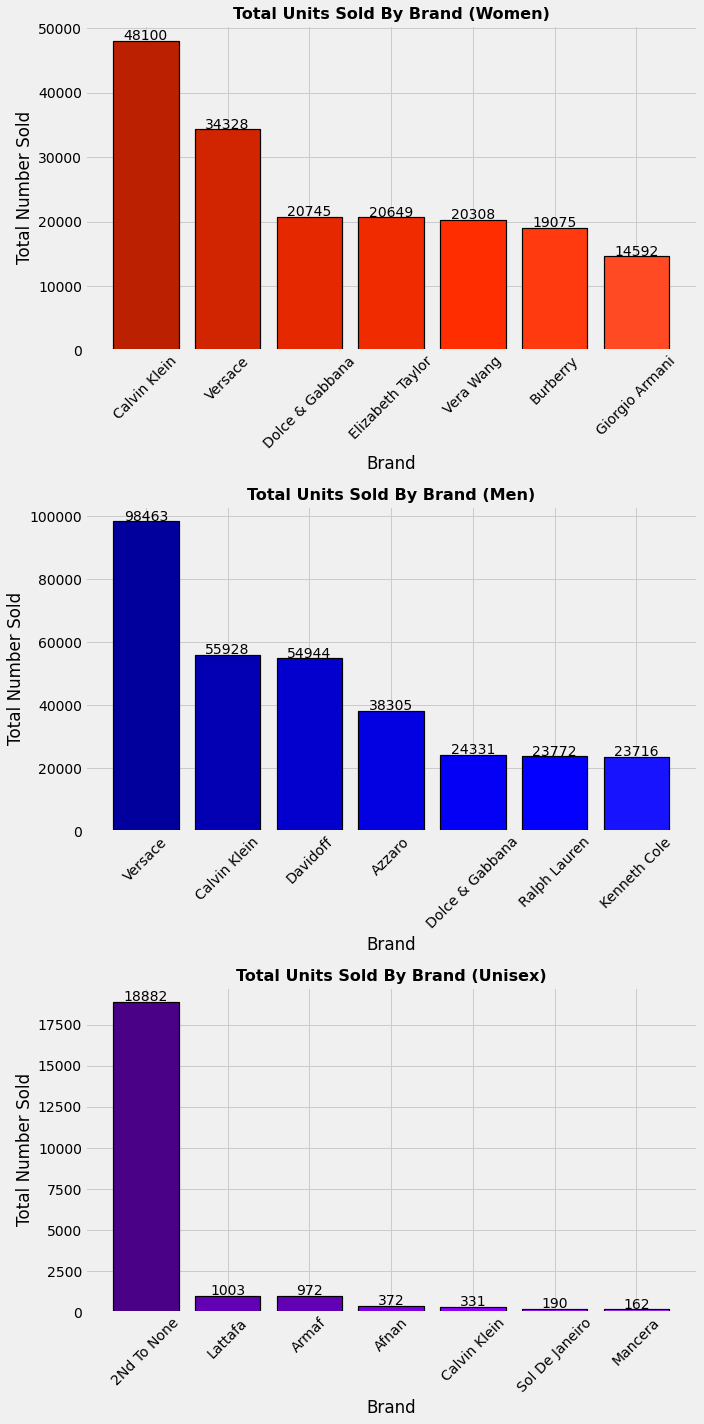

In [754]:
# What brands and types sell the most?
most_sold_brands_women = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forWomen'] == 1)], 'brand', 'sum', 'sold')[:7]
most_sold_brands_men = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forMen'] == 1)], 'brand', 'sum', 'sold')[:7]
most_sold_brands_unisex = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['unisex'] == 1)], 'brand', 'sum', 'sold')[:7]

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
n = 0
for data, label, colors in [(most_sold_brands_women, 'Women', red_colors[3:]), (most_sold_brands_men, 'Men', blue_colors[3:]), (most_sold_brands_unisex, 'Unisex', purple_colors[3:])]:
    ax[n].bar(x=data.index, height=data, color=colors, edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Total Units Sold By Brand ({label})')
    ax[n].set_xlabel('Brand')
    ax[n].set_ylabel('Total Number Sold')
    ax[n].tick_params(axis='x', rotation=45)
    for i in data.index:
        ax[n].annotate(f'{int(data[i])}', xy=(i, data[i] + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
    n += 1
plt.tight_layout();

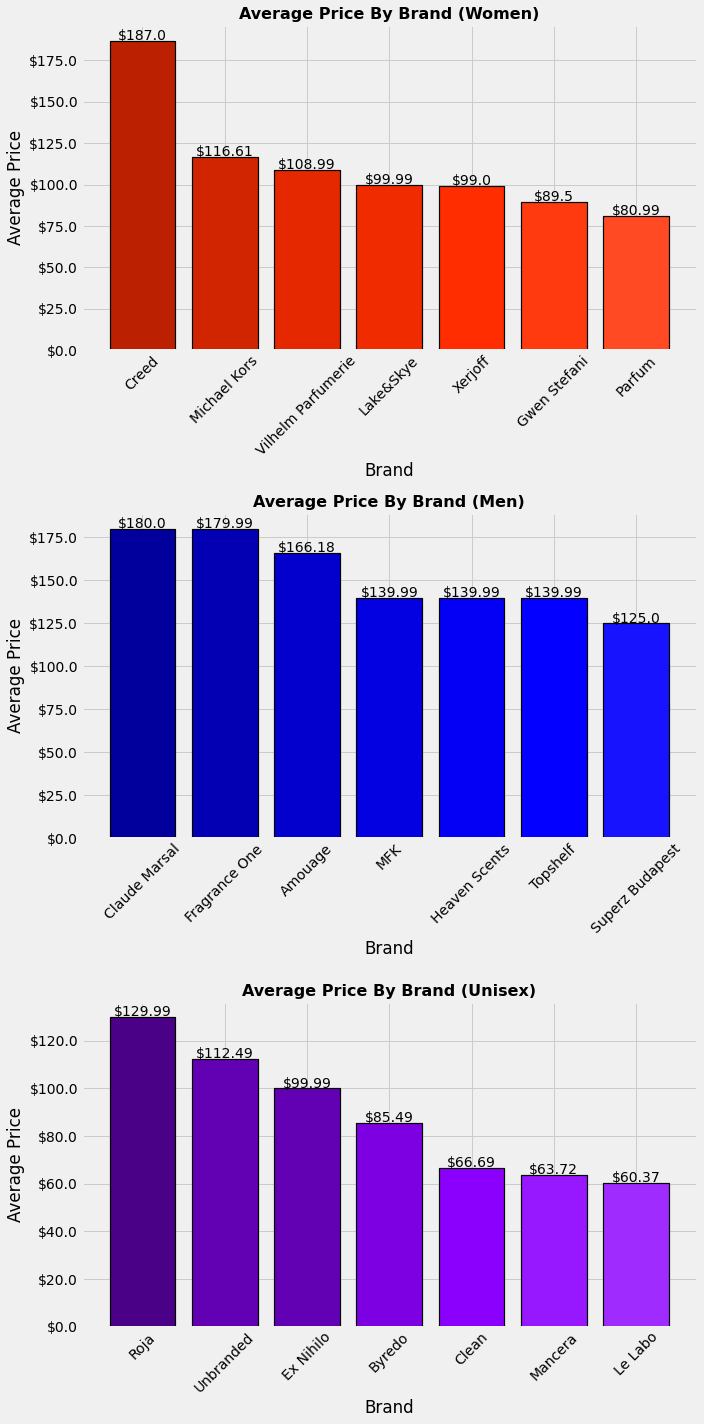

In [758]:
most_sold_brands_women = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forWomen'] == 1)], 'brand', 'mean', 'price')[:7]
most_sold_brands_men = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['forMen'] == 1)], 'brand', 'mean', 'price')[:7]
most_sold_brands_unisex = find_aggregate_columns(perfumes_clean.loc[(perfumes_clean['sold'] >= 0) & (perfumes_clean['unisex'] == 1)], 'brand', 'mean', 'price')[:7]

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
n = 0
for data, label, colors in [(most_sold_brands_women, 'Women', red_colors[3:]), (most_sold_brands_men, 'Men', blue_colors[3:]), (most_sold_brands_unisex, 'Unisex', purple_colors[3:])]:
    ax[n].bar(x=data.index, height=data, color=colors, edgecolor='black', linewidth=1.2)
    ax[n].set_title(f'Average Price By Brand ({label})')
    ax[n].set_xlabel('Brand')
    ax[n].set_ylabel('Average Price')
    ax[n].tick_params(axis='x', rotation=45)
    for i in data.index:
        ax[n].annotate(f'${data[i].round(2)}', xy=(i, data[i] + (.015 * ax[n].get_ylim()[1])), va='center', ha='center')
        ax[n].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:}'))
    n += 1
plt.tight_layout();